In [1]:
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
df_train=pd.read_csv("../input/titanic/train.csv")
df_test=pd.read_csv("../input//titanic/test.csv")

In [3]:
print("The shape of the training data is"+str(df_train.shape))
print("The shape of the test data is"+str(df_test.shape))


The shape of the training data is(891, 12)
The shape of the test data is(418, 11)


In [4]:
#lets see what out data contains
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#lets check the number of missing values 
#Missing values in the data train is
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Missing values in the data test is
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
#we will be changing the types of column of the training and test dataset
df_train["Sex"]=np.where(df_train["Sex"]=="male",1,0)

In [9]:
#we will be changing the types of column of the training and test dataset
df_test["Sex"]=np.where(df_test["Sex"]=="male",1,0)

In [10]:
df_train["Title"]=df_train["Name"].str.extract('([A-Za-z]+)\.',expand=False)
df_test["Title"]=df_test["Name"].str.extract('([A-Za-z]+)\.',expand=False)

In [11]:
df_train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Capt          1
Mme           1
Don           1
Countess      1
Lady          1
Ms            1
Jonkheer      1
Sir           1
Name: Title, dtype: int64

In [12]:
df_test["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [13]:
mapping={"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Mlle":3,"Col":3,"Major":3,
         "Capt":3,"Sir":3,"Ms":3,"Jonkheer":3,"Mme":3,"Countess":3,
         "Don":3,"Lady":3}


In [14]:
for values in df_test:
    df_train["title"]=df_train["Title"].map(mapping)

    
for values in df_test:
    df_test["title"]=df_test["Title"].map(mapping)
    

In [15]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,0


Text(0.5, 1.0, 'Title vs graph')

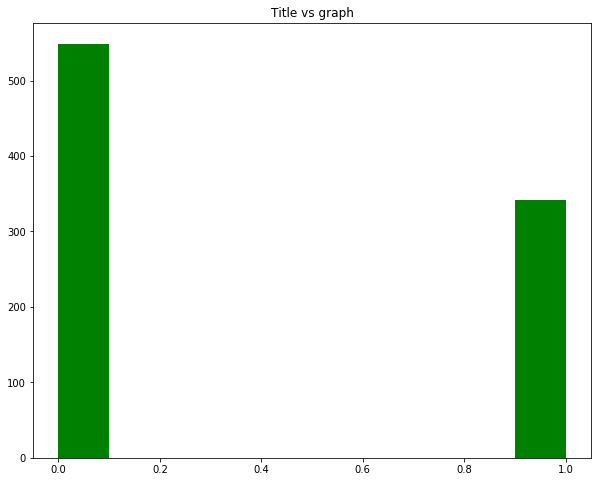

In [16]:
#now lets see the title relationship with the survived data
import seaborn as sns
my_colors = ['g']
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.hist(df_train["Survived"],color=my_colors)
plt.title("Title vs graph")


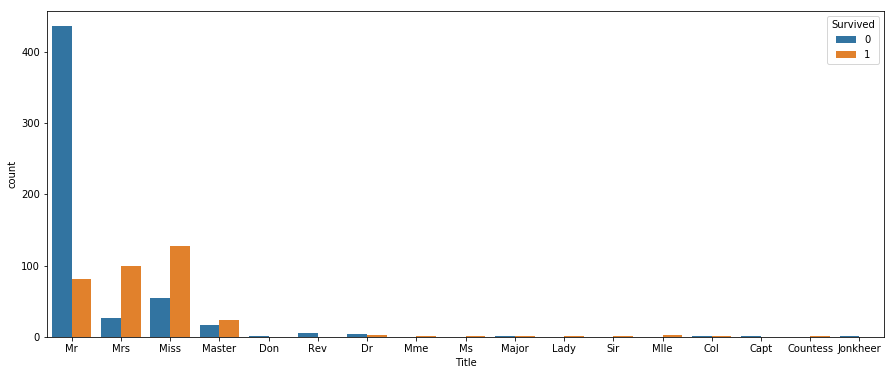

In [17]:
#by the means of this count plot we have seen that the survivors are in domination in female 
plt.figure(figsize=(15,6))
sns.countplot(df_train["Title"], hue=df_train['Survived'])

In [18]:
#lets drop the names now
df_train.drop(["Name"],axis=1,inplace=True)
df_test.drop(["Name"],axis=1,inplace=True)

In [19]:
x=df_train[df_train["Sex"]==0]
x=x[x["Survived"]==1]

In [20]:
y=df_train[df_train["Sex"]==1]
y=y[y["Survived"]==1]

Text(0.5, 1.0, 'Total number of females are314 males are577')

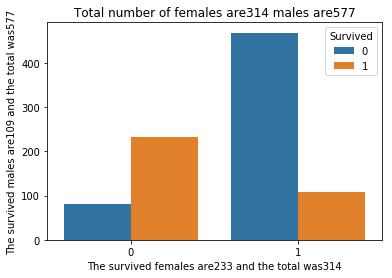

In [21]:
#lets check the male and female survivors
sns.countplot(df_train["Sex"],hue=df_train["Survived"])
plt.xlabel("The survived females are"+str(x.shape[0]) +" and the total was"+str(df_train["Sex"].value_counts()[0]))
plt.ylabel("The survived males are"+str(y.shape[0]) +" and the total was"+str(df_train["Sex"].value_counts()[1]))

plt.title("Total number of females are"+str(df_train["Sex"].value_counts()[0])+" " +"males are"+str(df_train["Sex"].value_counts()[1]) )


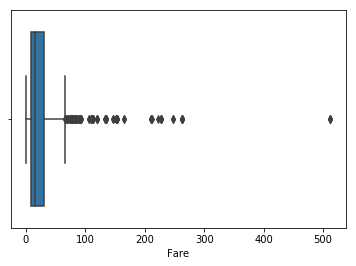

In [22]:
#lets drop the outliers for now
sns.boxplot(df_train["Fare"])

In [23]:
#getting the quantiles for 25 and 75 percentile
#Quantile1=np.percentile(df_train["Fare"],25)
#Quantile3=np.percentile(df_train["Fare"],75)
#IQR
#IQR=Quantile3-Quantile1
#Outliers_steps=1.5*IQR
#Outlier_indices=df_train[df_train["Fare"]<(Quantile1-Outliers_steps)]
#Outlier_indices1=df_train[df_train["Fare"]>(Quantile1+Outliers_steps)]
#print(Outliers_steps)

In [24]:
def outlier_detection(dataframe_to_check,number_of_total_outliers,list_of_features):
    index_of_outliers=[]
    for col in list_of_features:
        Quantile1=np.percentile(dataframe_to_check[col],25)
        Quantile3=np.percentile(dataframe_to_check[col],75)
        IQR=Quantile3-Quantile1
        outlier_factor=1.5*IQR
        outlier_list = dataframe_to_check[(dataframe_to_check[col] < Quantile1 - outlier_factor) | (dataframe_to_check[col] > Quantile3 + outlier_factor)].index
        #outlier_list=dataframe_to_check[dataframe_to_check[col]<(Quantile1-outlier_factor)| 
         #                               dataframe_to_check[col]>(Quantile3+outlier_factor)].index
        index_of_outliers.extend(outlier_list)
    
    index_of_outliers = Counter(index_of_outliers)        
    multiple_outliers = list( k for k, v in index_of_outliers.items() if v > number_of_total_outliers )
    return multiple_outliers



In [25]:
#Quantile1=np.percentile(Outlier_indices1["Fare"],25)
#Quantile3=np.percentile(Outlier_indices1["Fare"],75)
#IQR
#IQR=Quantile3-Quantile1
#Outliers_steps1=1.5*IQR
#Outliers_steps1
#Outlier_indices11=Outlier_indices1[Outlier_indices1["Fare"]<(Quantile1-Outliers_steps)]
#Outlier_indices111=Outlier_indices1[Outlier_indices1["Fare"]>(Quantile1+Outliers_steps)]

In [26]:
#seeing the outliers by row numbers
#for col in Outlier_indices111:
 #   print(df_train.loc[col])

In [27]:
#dropping the rows for outliers
#df_train.drop(inplace=True,index=Outlier_indices111)

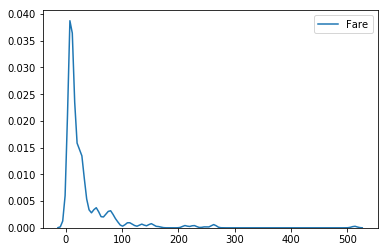

In [28]:
#this is the fare plot i.e the fare is maximum for 1-100 for normal ones
sns.kdeplot(df_train["Fare"])


<Figure size 720x576 with 0 Axes>

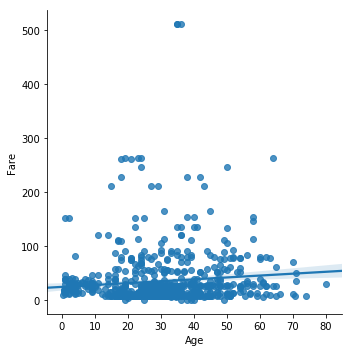

In [29]:
#by this graph we can see that the maximum crew on titanic was from the age band 
plt.figure(figsize=(10,8))
sns.lmplot(data=df_train,x="Age",y="Fare")
plt.show()

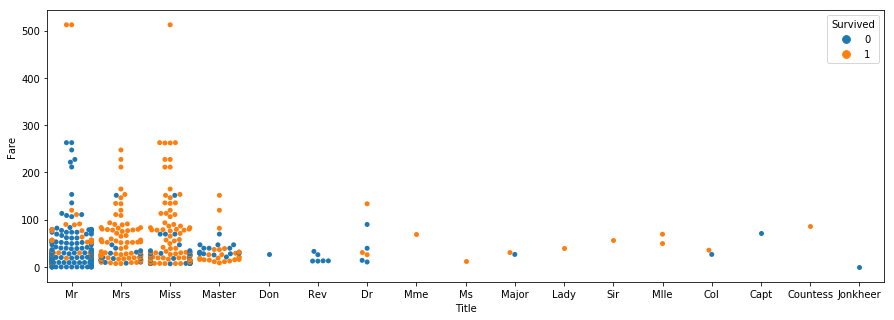

In [30]:

#by this graph we can see that the passengers are mostly man who have paid between 0-100$ and the ones who are survived
plt.figure(figsize=(15,5))
sns.swarmplot(df_train["Title"],df_train["Fare"],hue=df_train["Survived"])

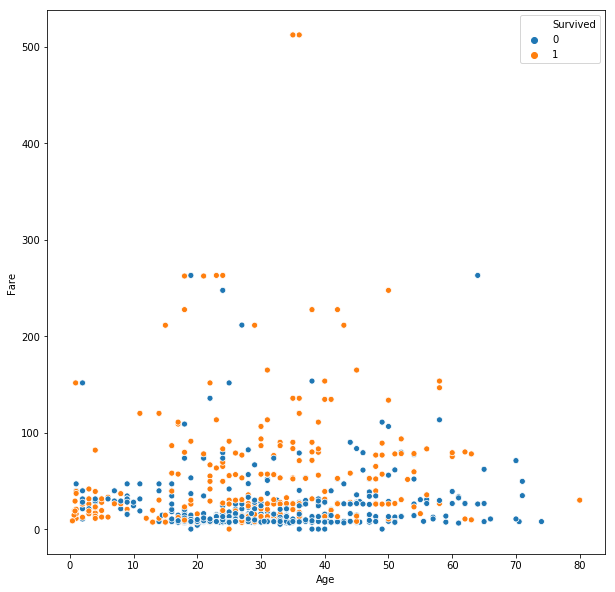

In [31]:
#lets check the dependency of fare vs age
plt.figure(figsize=(10,10))
sns.scatterplot(df_train["Age"],df_train["Fare"],hue=df_train["Survived"])

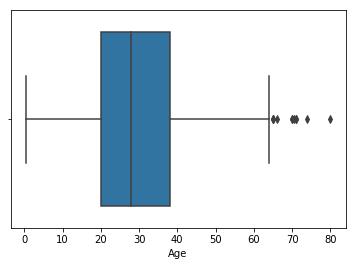

In [32]:
#checking the outliers for the age
sns.boxplot(df_train["Age"])

In [33]:
#checking the outliers in the age
#Quantile=np.percentile(df_train["Age"],25)

#Quantile3=np.percentile(df_train["Age"],75)
#IQR=Quantile3-Quantile1
#Outlier_factor=1.5*IQR

#outliers_lower=df_train[df_train["Age"]<(Quantile-Outlier_factor)]
#outliers_upper=df_train[df_train["Age"]>(Quantile3-Outlier_factor)]

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null object
title          891 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [35]:
outliers_df1=outlier_detection(df_train,2,["Age","SibSp","Parch","Fare"])
outliers_df1

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [36]:
#rows of the outliers
df_train.loc[outliers_df1]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,title
27,28,0,1,1,19.0,3,2,19950,263.00,C23 C25 C27,S,Mr,0
88,89,1,1,0,23.0,3,2,19950,263.00,C23 C25 C27,S,Miss,1
159,160,0,3,1,NaN,8,2,CA. 2343,69.55,NaN,S,Master,3
180,181,0,3,0,NaN,8,2,CA. 2343,69.55,NaN,S,Miss,1
201,202,0,3,1,NaN,8,2,CA. 2343,69.55,NaN,S,Mr,0
324,325,0,3,1,NaN,8,2,CA. 2343,69.55,NaN,S,Mr,0
341,342,1,1,0,24.0,3,2,19950,263.00,C23 C25 C27,S,Miss,1
792,793,0,3,0,NaN,8,2,CA. 2343,69.55,NaN,S,Miss,1
846,847,0,3,1,NaN,8,2,CA. 2343,69.55,NaN,S,Mr,0
863,864,0,3,0,NaN,8,2,CA. 2343,69.55,NaN,S,Miss,1


In [37]:
#now lets drop these rows which have more 2 or more than 2 outliers
df_train.drop(index=outliers_df1,inplace=True)

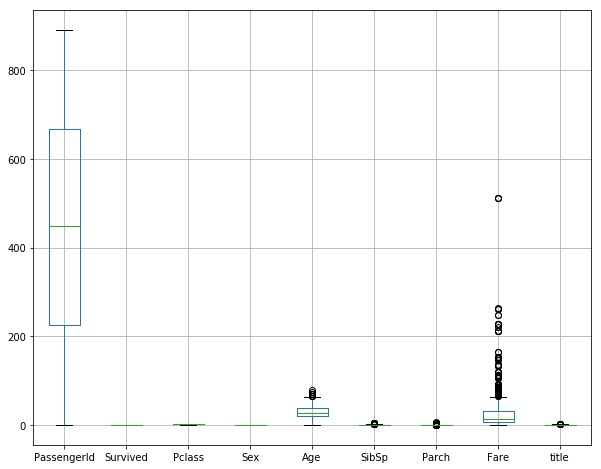

In [38]:
plt.figure(figsize=(10,8))
df_train.boxplot()

In [39]:
#lets see how our numeric data is related to other data
print(df_train[["Parch","Survived","SibSp","Age","Fare"]].corr())
#fare is the most effecting feature on the survival chances

             Parch  Survived     SibSp       Age      Fare
Parch     1.000000  0.092819  0.379281 -0.186457  0.183801
Survived  0.092819  1.000000  0.003330 -0.076867  0.264613
SibSp     0.379281  0.003330  1.000000 -0.307129  0.110072
Age      -0.186457 -0.076867 -0.307129  1.000000  0.110219
Fare      0.183801  0.264613  0.110072  0.110219  1.000000


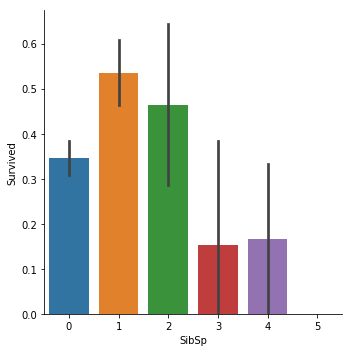

In [40]:
sns.catplot(x="SibSp",y="Survived",data=df_train,kind="bar")

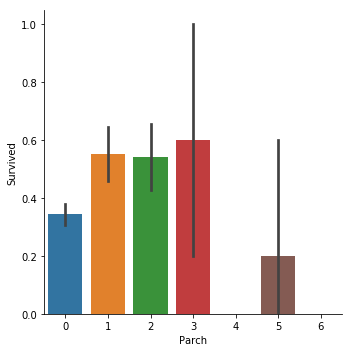

In [41]:
sns.catplot(x="Parch",y="Survived",data=df_train,kind="bar")

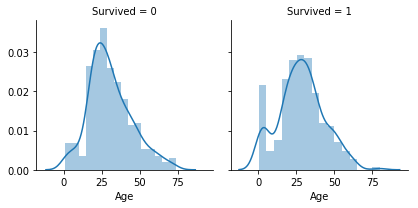

In [42]:
#for multiple plots 
g=sns.FacetGrid(df_train,col="Survived")
g=g.map(sns.distplot,"Age")
#the childrens have high chance of survival

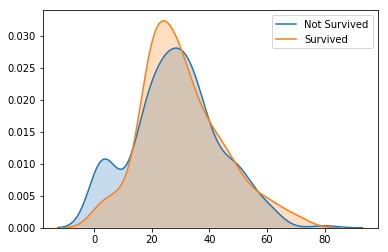

In [43]:
g=sns.kdeplot(df_train["Age"][(df_train["Survived"]==1)& (df_train["Age"].notnull())],shade=True)
g=sns.kdeplot(df_train["Age"][(df_train["Survived"]==0)& (df_train["Age"].notnull())],ax=g,shade=True)
g.legend(["Not Survived","Survived"])

In [44]:
df_train["data"],df_test["data"]="train","test"


In [45]:
final_df=pd.concat(objs=[df_train,df_test],axis=0).reset_index(drop=True)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [46]:
final_df.shape

(1299, 14)

In [47]:
final_df["Fare"].isnull().sum()
final_df["Fare"] = final_df["Fare"].fillna(final_df["Fare"].median())

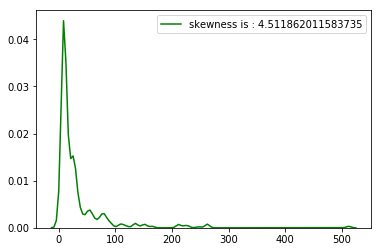

In [48]:
sns.kdeplot(final_df["Fare"],color='g',label="skewness is : "+str(final_df["Fare"].skew()))

In [49]:
#as we can see that the distribution is pareto so the scaling wont work for it
#lets transform it using log distribution
final_df["Fare"]=final_df["Fare"].map(lambda x: np.log(x) if x>0 else 0)

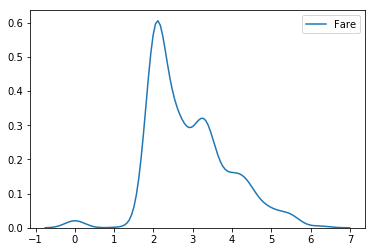

In [50]:
#now lets check the distribution of the Fare column
sns.kdeplot(final_df["Fare"])

In [51]:
#now lets see how pclass effect the SUrvived

sns.catplot(df_train["Pclass"],df_)

NameError: name 'df_' is not defined